In [116]:
import numpy as np
from scipy.signal import butter
import scipy 
import matplotlib.pyplot as plt
from scipy.signal import freqz
import pandas as pd

In [146]:
class ButterworthBandPassFilter(object):

    def __init__(self, f_low, f_high, Fs, order):
        self.f_low = f_low
        self.f_high = f_high
        self.Fs = Fs
        self.order = order

    def compute_normalized_freqs(self):
        # return the normalized frequencies using that formulas
        pass
        # print the normalized frequencies here, 
        # you can print it as a pandas data frame
        normalizer = lambda x: 2 * (x / self.Fs)
        w_low = normalizer(self.f_low)
        w_high = normalizer(self.f_high)
        return w_low, w_high
        
    def display_normalized_freqs(self):
        w_low, w_high = self.compute_normalized_freqs()
        df = pd.DataFrame.from_dict({
            "Frequency": [self.f_low, self.f_high],
            "Normalized Frequency": [w_low, w_high]
        })
        display(df)
    
    def compute_coefficients(self): # return b, a coefficients
        b, a = butter(self.order, [self.f_low, self.f_high], fs=self.Fs, btype='band')
        return b, a

    def generate_impulse_response(self):
        b, a = self.compute_coefficients()
        T, h = scipy.signal.impulse([b, a])
        h = h / self.Fs
        return T, h

    def display_coefficients(self):
        #  build the pandas frame to show coefficients
        b, a = self.compute_coefficients()
        df = pd.DataFrame.from_dict(
            {
                "a": a,
                "b": b
            }
        )
        display(df)

    def plot_transfer_function(self, title='', plot_axis=True, show=True):
        b, a = self.compute_coefficients()
        # plt.figure(figsize=(12, 7))
        w, h = freqz(b, a, fs=self.Fs, worN=self.Fs)
        

        plt.plot(w, abs(h), label='Filtre:ordre={}'.format(self.order))
        plt.xlabel('Frequence')
        plt.ylabel('Amplitude')
        if plot_axis:
            # for the first frequency
            
            plt.axhline(y = 1/np.sqrt(2), color = 'g', linestyle = '--') 
            plt.axvline(x = self.f_low, color = 'g', linestyle = '--') 
            plt.axvline(x = self.f_high, color = 'g', linestyle = '--') 
        if show:
            plt.show()


In [147]:
def plot_filters(f_low, f_high, Fs, orders):
    filters = [
        ButterworthBandPassFilter(
            f_low=f_low, f_high=f_high, Fs=Fs, order=order
        )
        for order in orders    
    ]

    for filter in filters:
        filter.plot_transfer_function(show=False)
    plt.legend()
    plt.show()


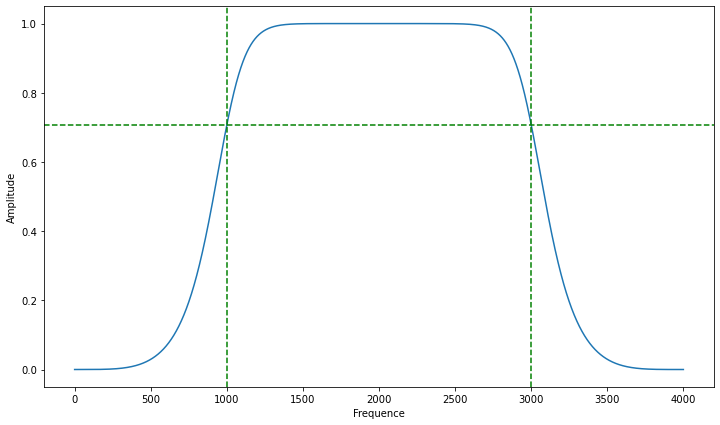

In [148]:

F_LOW = 1000
F_HIGH = 3000
FS = 8000
ORDER = 4
plt.figure(figsize=(12, 7))
f = ButterworthBandPassFilter(f_low=F_LOW, f_high=F_HIGH, Fs=FS, order=ORDER)

f.plot_transfer_function()

In [149]:
f.display_coefficients()

,a,b
0,1.000000e+00,0.093981
1,-4.440892e-16,0.000000
2,-2.775558e-16,-0.375923
3,2.220446e-16,0.000000
4,4.860288e-01,0.563885
5,-5.551115e-17,0.000000
6,-5.724587e-17,-0.375923
7,-1.734723e-18,0.000000
8,1.766480e-02,0.093981


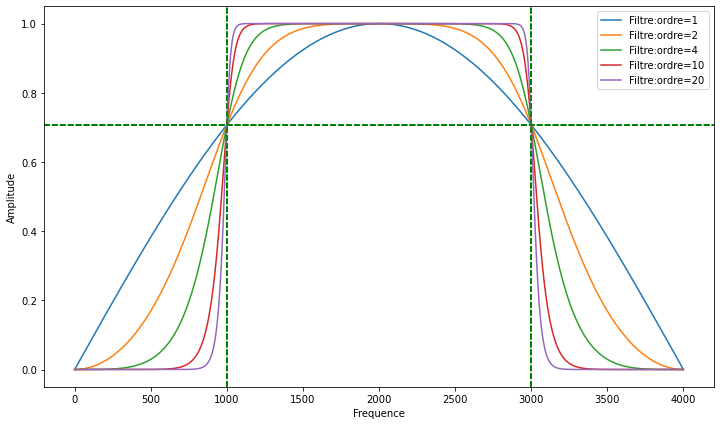

In [150]:
ORDERS = [1, 2, 4,  10, 20]
plt.figure(figsize=(12, 7))
plot_filters(F_LOW, F_HIGH, FS, ORDERS)

In [151]:
f.display_normalized_freqs()

,Frequency,Normalized Frequency
0,1000,0.25
1,3000,0.75
